<a href="https://colab.research.google.com/github/FajarWahyuni/Learn-ML/blob/main/Disney%2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DISNEY+**

# About Dataset
Disney+ adalah salah satu platform media dan streaming video paling populer. Ada hampir 1.300 film dan tv show yang ada di platform tersebut, pada pertengahan tahun 2021, ada lebih dari 116 juta pelanggan secara global. Dataset ini terdiri dari daftar semua film dan tv show yang ada Disney+, beserta detail seperti pemeran, director, rating, tahun rilis, durasi, dan lain-lain.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd #data frane
import seaborn as sns #visualisasi
import matplotlib.pyplot as plt # visualisasi
import numpy as np

In [3]:
df = pd.read_csv('/content/drive/MyDrive/disney_plus_titles.csv')
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


In [5]:
df.shape

(1450, 12)

In [6]:
df.isnull().sum()

show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64

Ada masalah missing value pada variabel director, cast, country, date_added, rating.

In [7]:
df['director'].fillna('Unavailable', inplace=True)
df['cast'].fillna('Unavailable', inplace=True)
df['country'].fillna('Unavailable', inplace=True)
df['date_added']=df['date_added'].ffill()
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

Cara mengatasinya kita gunakan metode fill atau mengisinya dengan nilai/value yang ditentukan.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      1450 non-null   object
 4   cast          1450 non-null   object
 5   country       1450 non-null   object
 6   date_added    1450 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1450 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


In [9]:
df.duplicated().sum()

0

Tidak ada data yang duplikat

Selanjutnya kita buang saja variabel yang tidak memberikan informasi yang begitu berpengaruh. Contohnya show_id dan description.

In [10]:
df.drop(['show_id'], axis = 1, inplace=True)
df.drop(['description'], axis =1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          1450 non-null   object
 1   title         1450 non-null   object
 2   director      1450 non-null   object
 3   cast          1450 non-null   object
 4   country       1450 non-null   object
 5   date_added    1450 non-null   object
 6   release_year  1450 non-null   int64 
 7   rating        1450 non-null   object
 8   duration      1450 non-null   object
 9   listed_in     1450 non-null   object
dtypes: int64(1), object(9)
memory usage: 113.4+ KB


Kita akan melihat perbandingan jumlah TV Show dan Movies yang ada di Disney+

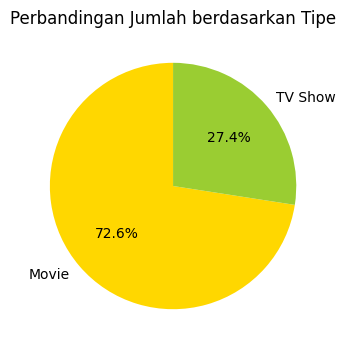

In [13]:
pie = df['type'].value_counts()
colors = ['gold', 'yellowgreen']

plt.figure(figsize=(4,4))
pie.plot.pie(autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Perbandingan Jumlah berdasarkan Tipe')
plt.ylabel('')  #hiding y axis since it is distractive
plt.show()

Hasilnya menunjukkan bahwa Movie lebih besar daripada TV show. Dengan jumlah movie sebesar 72.6%, sedangkan Tv show hanya 27.4%.

Selanjutnya kita juga bisa mengetahui siapa si director yang paling banyak mendirect film di disney+ ini.

<ipython-input-33-b93949eaaaa2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=director_counts.head(10).values, y=director_counts.head(10).index, palette="viridis")


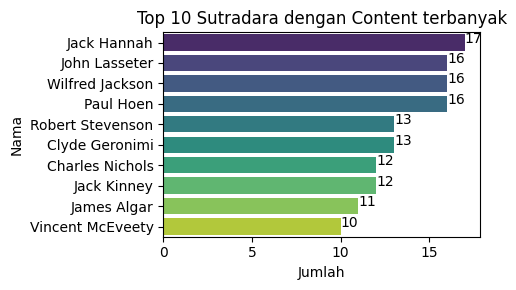

In [33]:
directors = df['director'].astype(str).str.split(',').explode().str.strip()
directors = directors[directors != 'Unavailable']
director_counts = directors.value_counts()

plt.figure(figsize=(5, 3))
sns.barplot(x=director_counts.head(10).values, y=director_counts.head(10).index, palette="viridis")
plt.title('Top 10 Sutradara dengan Content terbanyak')
plt.xlabel('Jumlah')
plt.ylabel('Nama')
plt.tight_layout()
for index, value in enumerate(director_counts.head(10).values):
    plt.text(value, index, str(value), color='black', ha="left")
plt.show()

Hasil di atas menampilkan top 10 saja. Terlihat bahwa Jack Hannah adalah director yang paling banyak mendirect di Disney+ dengan jumlah contentnya ada 17.

Bagaimana dengan ratingnya?
Ada beberapa hal yang diketahui untuk jenis ratingnya.
1. TV-G : Umum, cocok untuk semua umur
2. TV-PG : parental guide, harus ada pengawasan orang tua
3. G : umum, cocok untuk semua umur
4. PG : parental guide
5. TV-Y7 : direkomendasikan untuk anak-anak usia 7 tahun atau lebih
6. TV-14 : diharuskan adanya orang tua bagi anak-anak di bawah umur 14 tahun
7. PG-13 : diharuskan adanya orang tua bagi anak-anak di bawah umur 13 tahun
8. TY-Y : semua anak
9. TV-Y7-VY : untuk anak-anak usia minimal 7 tahun

<ipython-input-21-3ebb46efbe58>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating.index, y=rating.values, palette='viridis')


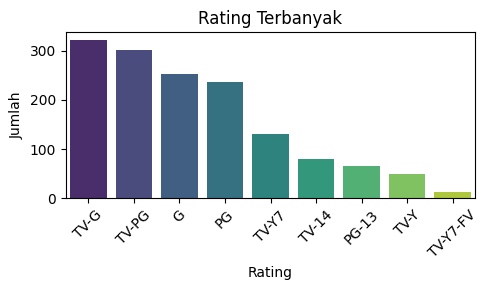

In [21]:
rating = df['rating'].value_counts()

plt.figure(figsize=(5,3))
sns.barplot(x=rating.index, y=rating.values, palette='viridis')
plt.title('Rating Terbanyak')
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Hasilnya konten dengan rating terbanyak ada pada Rating TV-G

Selanjutnya, top 10 negara dengan jumlah konten terbanyak.

<ipython-input-34-87d5aef0fe35>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_countries.index, y=top_10_countries.values, palette='viridis')


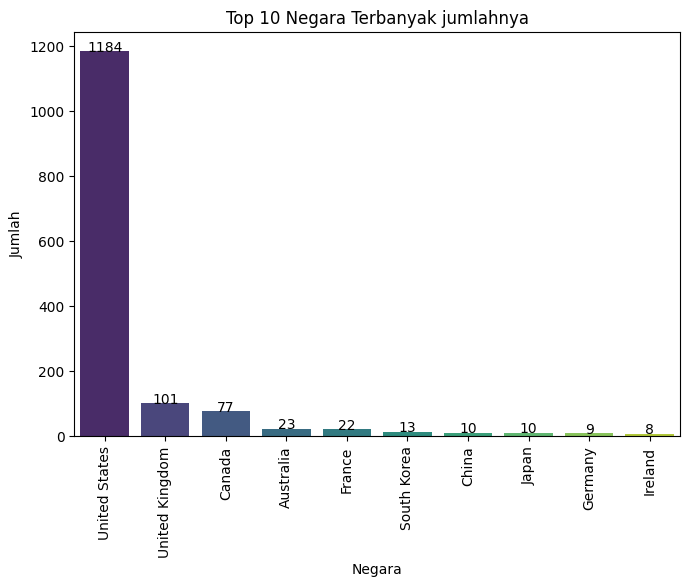

In [34]:
negara = df['country'].str.split(',').explode()
negara = negara[negara != 'Unavailable']
jumlah_negara = negara.str.strip().value_counts()
top_10_countries = jumlah_negara.head(10)

plt.figure(figsize=(7,5))
sns.barplot(x=top_10_countries.index, y=top_10_countries.values, palette='viridis')
plt.title('Top 10 Negara Terbanyak jumlahnya')
plt.xlabel('Negara')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.xticks(rotation=90)
for index, value in enumerate(top_10_countries.values):
    plt.text(index, value, str(value), color='black', ha="center")

plt.show()

United States tercatat sebagai negara dengan jumlah konten paling tinggi, sebanyak 1184 konten.

<ipython-input-27-a33889a11ace>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['season_count'] = tv_shows['duration'].str.extract('(\d+)').astype(int)
<ipython-input-27-a33889a11ace>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=jumlah.index, y=jumlah.values, palette='viridis')


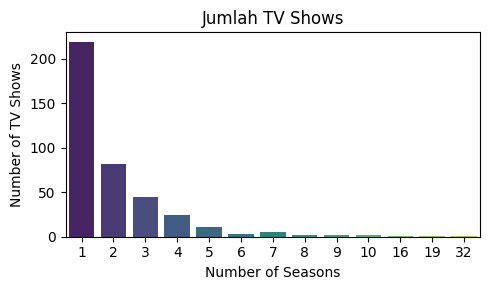

                      title        country  season_count
13    Dr. Oakley, Yukon Vet  United States            10
92             The Simpsons  United States            32
106         Life Below Zero  United States            16
115  The Incredible Dr. Pol  United States            19
216             Wicked Tuna  United States            10


In [27]:
tv_shows = df[df['type'] == 'TV Show']
tv_shows['season_count'] = tv_shows['duration'].str.extract('(\d+)').astype(int)
jumlah = tv_shows['season_count'].value_counts().sort_index()

plt.figure(figsize=(5,3))
sns.barplot(x=jumlah.index, y=jumlah.values, palette='viridis')
plt.title('Jumlah TV Shows')
plt.xlabel('Number of Seasons')
plt.ylabel('Number of TV Shows')
plt.tight_layout()
plt.show()

selected_shows = tv_shows[tv_shows['season_count'].isin([10, 16, 19, 32])][['title','country', 'season_count']]
print(selected_shows)

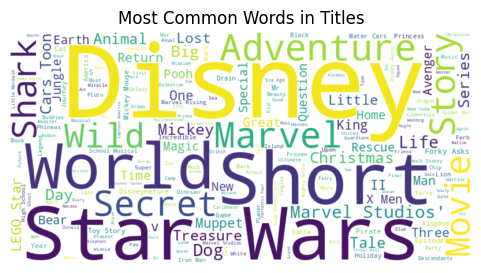

In [28]:
from wordcloud import WordCloud

all_words = ' '.join(df['title'])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_words)

plt.figure(figsize=(6, 3))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Titles')
plt.show()